In [1]:
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import os

from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('../data/train_test/anxiety_train.csv')

In [3]:
X = data.drop(columns='Anxiety_Group')

y = data['Anxiety_Group']

In [4]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)

In [5]:
gbr = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [6]:
y_pred_gbr = gbr.predict(X_test)

In [7]:
acc_gbr = accuracy_score(y_test, y_pred_gbr)

In [8]:
print("Accuracy Decision Tree:", acc_gbr)

Accuracy Decision Tree: 0.9375187744067287


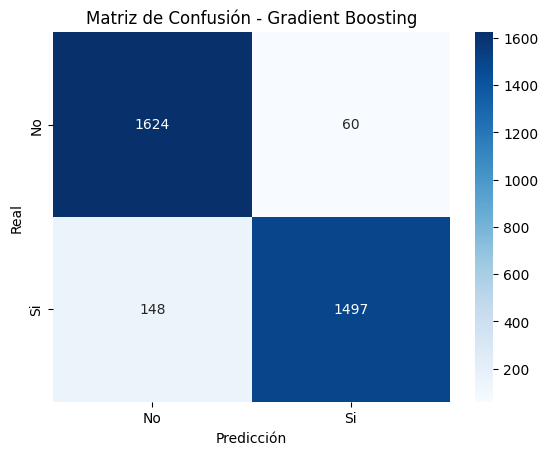

In [9]:
cm = confusion_matrix(y_test, y_pred_gbr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - Gradient Boosting")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Grid serch

In [10]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 2, 3],
    'min_samples_leaf': [0.001, 0.01, 0.1],
    'subsample': [0.8, 0.9, 1]
}

In [11]:
grid = GridSearchCV(
    estimator=GradientBoostingClassifier(), 
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

In [12]:
grid.fit(X_train, y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'max_depth': [1, 2, ...], 'min_samples_leaf': [0.001, 0.01, ...], 'n_estimators': [100, 200, ...], 'subsample': [0.8, 0.9, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [13]:
pred = grid.predict(X_test)

In [14]:
print("Mejor accuracy CV:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

Mejor accuracy CV: 0.9523845287269996
Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 0.01, 'n_estimators': 300, 'subsample': 0.8}


In [15]:
results = pd.DataFrame(grid.cv_results_)
results = results[[
    'param_n_estimators',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'    ]]

print(results.sort_values(by='rank_test_score'))

    param_n_estimators  mean_test_score  std_test_score  rank_test_score
69                 300         0.952385        0.004788                1
70                 300         0.952084        0.004836                2
60                 300         0.951633        0.004198                3
61                 300         0.951633        0.004356                3
57                 200         0.951183        0.004229                5
..                 ...              ...             ...              ...
1                  100         0.890950        0.005277               77
18                 100         0.890800        0.004343               78
0                  100         0.890575        0.004706               79
10                 100         0.890499        0.005537               80
19                 100         0.890124        0.005859               81

[81 rows x 4 columns]


In [19]:
results['param_n_estimators'] = results['param_n_estimators'].astype(int)
grouped = results.groupby('param_n_estimators')['mean_test_score'].mean()


In [17]:
'''plt.figure(figsize=(8,6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.title("Accuracy medio vs n_estimators (Gradient Boosting)")
plt.xlabel("n_estimators")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)'''

'plt.figure(figsize=(8,6))\nplt.plot(grouped.index, grouped.values, marker=\'o\', linestyle=\'-\')\nplt.title("Accuracy medio vs n_estimators (Gradient Boosting)")\nplt.xlabel("n_estimators")\nplt.ylabel("Mean CV Accuracy")\nplt.grid(True)'

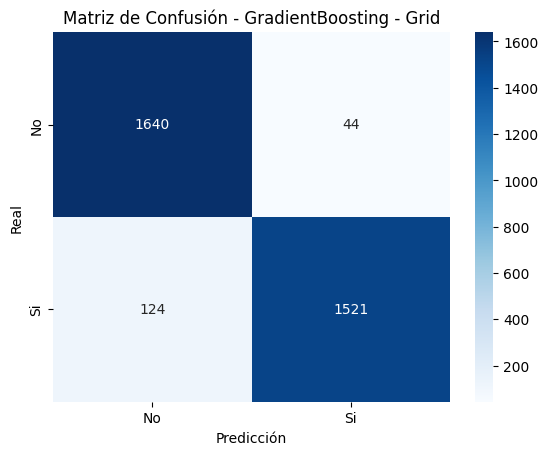

In [22]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - GradientBoosting - Grid")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [23]:
models = '../models'
best_model = grid.best_estimator_
final_model_path = os.path.join(models, 'modelo_gradiente_boosting_classifier.pkl')
joblib.dump(best_model, final_model_path)
print(f"Modelo final guardado en: {final_model_path}")

Modelo final guardado en: ../models\modelo_gradiente_boosting_classifier.pkl
